<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 2

## 🌻 Welcome to Chapter 2, "Biases and Data Augmentation"


In this chapter, we’ll cover the following primary topics. 

- Computational Biases 

- Human Biases 

- Systemic Biases 

- Deep Dive to Image Augmentation Biases 

- Deep Dive to Text Augmentation Biases 

## Set up: Bring back Pluto

### ✋ STOP

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.



### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 12), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (31/31), done.


### Fetch file from URL

In [3]:
import requests
#
def fetch_file(url, dst):
  downloaded_obj = requests.get(url)
  with open(dst, "wb") as file:
    file.write(downloaded_obj.content)
  return

In [ ]:
url = ''
dst = 'pluto_chapter_1.py'
fetch_file(url,dst)

- Wake up Pluto

In [5]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_1.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PackTDataAug'> Class: PackTDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [6]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/08/16 06:26
                    Platform : linux
       Python version (3.7+) : 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
     PyTorch version (1.11+) : 1.12.1+cu113
     Pandas version (1.3.5+) : 1.3.5
        PIL version (9.0.0+) : 7.1.2
 Matplotlib version (3.2.2+) : 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


- Copy the Pluto chapter 1 to begin chapter 2

In [7]:
pluto_chapter_2 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
!cp {pluto_file} {pluto_chapter_2}

# Fetch Kaggle Data

In [8]:
# %write -a {pluto_chapter_2}

# easy method to download kaggle data files
!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22


### Define Kaggle Download Functions

✋ STOP

- Sign up on kaggle.com and get username ad key

In [9]:
kaggle_username = "duchaba"
kaggle_key = "0c737c90feacb5c56232b0d7c24e8664"

In [10]:
@add_method(PackTDataAug)
def write_kaggle_credit(self,username=kaggle_username,key=kaggle_key):
  creds = '{"username":"'+username+'","key":"'+key+'"}'
  kdirs = ["~/.kaggle/kaggle.json", "./kaggle.json"]
  #
  for k in kdirs:
    cred_path = pathlib.Path(k).expanduser()
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)
  import kaggle
  #
  return
#
@add_method(PackTDataAug)
def fetch_kaggle_comp_data(self,cname, username=kaggle_username,key=kaggle_key):
  self.write_kaggle_credit(username=username,key=key)
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return
#
#
@add_method(PackTDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle",
  username=kaggle_username,key=kaggle_key):
  self.write_kaggle_credit(username=username,key=key)
  opendatasets.download(url,data_dir=dest)
  return

### Fetch Kaggle data

In [11]:
#
%%time
url = "https://www.kaggle.com/datasets/nafin59/monkeypox-skin-lesion-dataset"
pluto.fetch_kaggle_dataset(url)

100%|██████████| 46.3M/46.3M [00:00<00:00, 72.1MB/s]



CPU times: user 877 ms, sys: 362 ms, total: 1.24 s
Wall time: 2.49 s


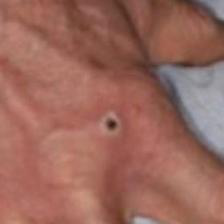

In [12]:
# quick view one image
f = 'kaggle/monkeypox-skin-lesion-dataset/Original Images/Original Images/Monkey Pox/M01_03.jpg'
img = PIL.Image.open(f)
display(img)

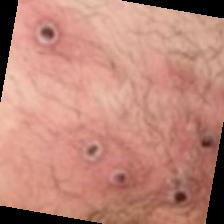

In [13]:
f = 'kaggle/monkeypox-skin-lesion-dataset/Augmented Images/Augmented Images/Monkeypox_augmented/M01_01_02.jpg'
img = PIL.Image.open(f)
display(img)

In [14]:
import kaggle
import zipfile
import os

In [15]:
kaggle_competition_name = "state-farm-distracted-driver-detection"
pluto.fetch_kaggle_comp_data(kaggle_competition_name)

100%|██████████| 4.00G/4.00G [00:17<00:00, 251MB/s]


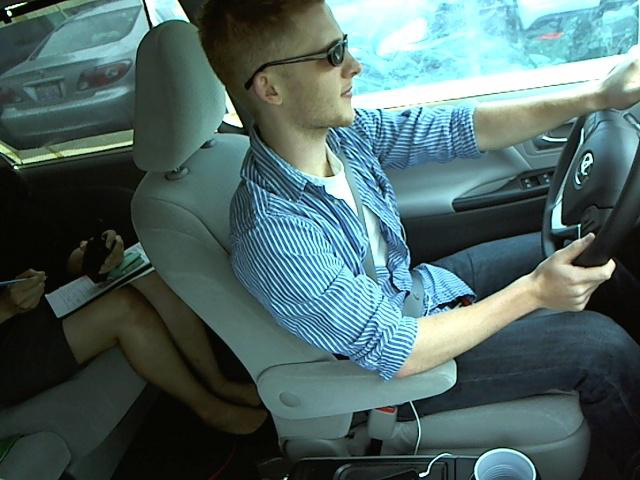

In [16]:
# quick view one image
f = 'state-farm-distracted-driver-detection/imgs/train/c0/img_100026.jpg'
img = PIL.Image.open(f)
display(img)

# Draw the Images

In [17]:
pluto.fname_id = 0

In [18]:
#
@add_method(PackTDataAug)
def _drop_image(self,canvas, fname=None,format=".jpg",dname="Data-Augmentation-with-Python/pluto_img"):
  if (fname is None):
    self.fname_id += 1
    if not os.path.exists(dname):
      os.makedirs(dname)
    fn = dname + "/pluto" + str(self.fname_id) + format
  else:
    fn = fname
  canvas.savefig(fn, cmap="Greys", bbox_inches="tight", pad_inches=0.25)
  return
#
@add_method(PackTDataAug)
def draw_batch(self,df_filenames, disp_max=10,is_shuffle=False, figsize=(16,8)):
  disp_col = 5
  disp_row = int(numpy.round((disp_max/disp_col)+0.4, 0))
  _fns = list(df_filenames)
  if (is_shuffle):
    numpy.random.shuffle(_fns)
  k = 0
  clean_fns = []
  if (len(_fns) >= disp_max):
    canvas, pic = matplotlib.pyplot.subplots(disp_row,disp_col, figsize=figsize)
    for i in range(disp_row):
      for j in range(disp_col):
        try:
          im = PIL.Image.open(_fns[k])
          pic[i][j].imshow(im)
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
          clean_fns.append(_fns[k])
        except:
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
        k += 1
    canvas.tight_layout()
    self._drop_image(canvas)
    canvas.show()
  else:
    print("**Warning: the length should be more then ", disp_max, ". The given length: ", len(_fns))
  return clean_fns

- Create Pandas data frame to hold the data

In [19]:
@add_method(PackTDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(f)
  return df

In [20]:
f = 'state-farm-distracted-driver-detection/driver_imgs_list.csv'
pluto.df_sf_data = pluto.fetch_df(f)

In [21]:
pluto.df_sf_data.describe()

subject classname            img
count    22424     22424          22424
unique      26        10          22424
top       p021        c0  img_44733.jpg
freq      1237      2489              1

In [22]:
pluto.df_sf_data.tail(3)

subject classname            img
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

- Add in the full path column

In [23]:
@add_method(PackTDataAug)
def build_sf_fname(self, df):
  root = 'state-farm-distracted-driver-detection/imgs/train/'
  df["fname"] = root + df.classname + '/' + df.img
  return

In [24]:
pluto.build_sf_fname(pluto.df_sf_data)

In [25]:
pluto.df_sf_data.head(3)

subject classname            img  \
0    p002        c0  img_44733.jpg   
1    p002        c0  img_72999.jpg   
2    p002        c0  img_25094.jpg   

                                               fname  
0  state-farm-distracted-driver-detection/imgs/tr...  
1  state-farm-distracted-driver-detection/imgs/tr...  
2  state-farm-distracted-driver-detection/imgs/tr...

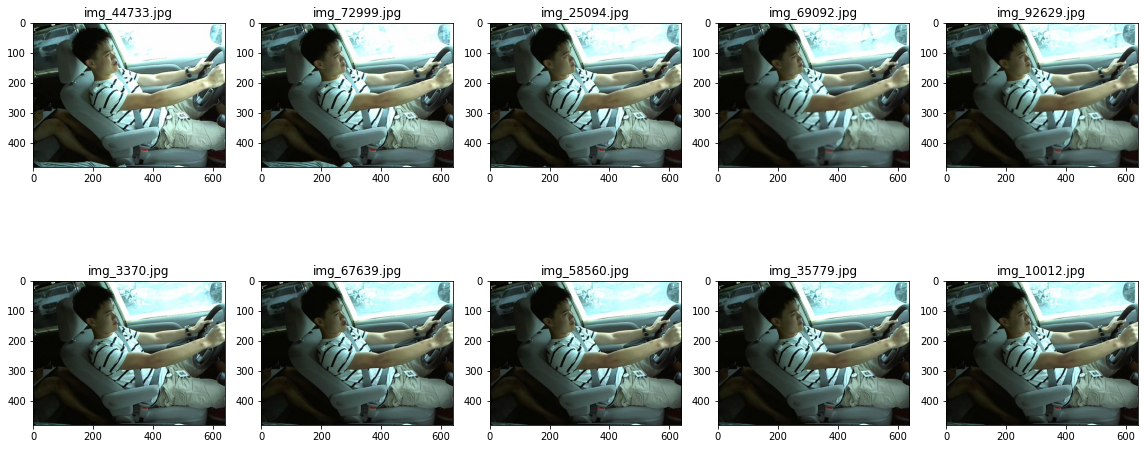

In [26]:
x = pluto.draw_batch(pluto.df_sf_data["fname"])

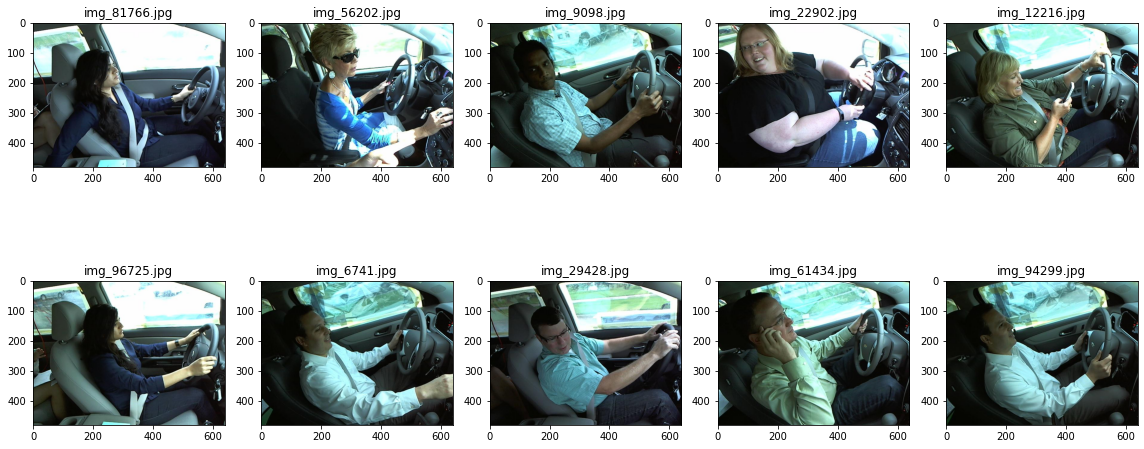

In [27]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True)

In [ ]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True,disp_max=200,figsize=(18,150))

- MonkeyPox

In [28]:
f = 'kaggle/monkeypox-skin-lesion-dataset/Monkeypox_Dataset_metadata.csv'
pluto.df_monkey_data = pluto.fetch_df(f)
pluto.df_monkey_data.head(3)

ImageID      Label
0  M01_01  Monkeypox
1  M01_02  Monkeypox
2  M01_03  Monkeypox

In [29]:
pluto.df_monkey_data.tail(3)

ImageID          Label
225  NM108_01  Non Monkeypox
226  NM109_01  Non Monkeypox
227  NM110_01  Non Monkeypox

- Run this until No error
- 3 times for monkeypox 

In [32]:
!find . -name "* *" -type d | rename 's/ /_/g'

In [33]:
@add_method(PackTDataAug)
def build_monkey_fname(self, df):
  url_monkey = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Monkey_Pox/'
  url_other = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Others/'
  df["fname"] = url_monkey + df.ImageID + ".jpg"
  # quick replace other
  df.loc[df['Label'] == 'Non Monkeypox', 'fname'] = url_other + df.ImageID + ".jpg"
  return


In [34]:
pluto.build_monkey_fname(pluto.df_monkey_data)
pluto.df_monkey_data.head(3)

ImageID      Label                                              fname
0  M01_01  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...
1  M01_02  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...
2  M01_03  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...

In [35]:
pluto.df_monkey_data.tail(3)

ImageID          Label  \
225  NM108_01  Non Monkeypox   
226  NM109_01  Non Monkeypox   
227  NM110_01  Non Monkeypox   

                                                 fname  
225  kaggle/monkeypox-skin-lesion-dataset/Original_...  
226  kaggle/monkeypox-skin-lesion-dataset/Original_...  
227  kaggle/monkeypox-skin-lesion-dataset/Original_...

- Draw it

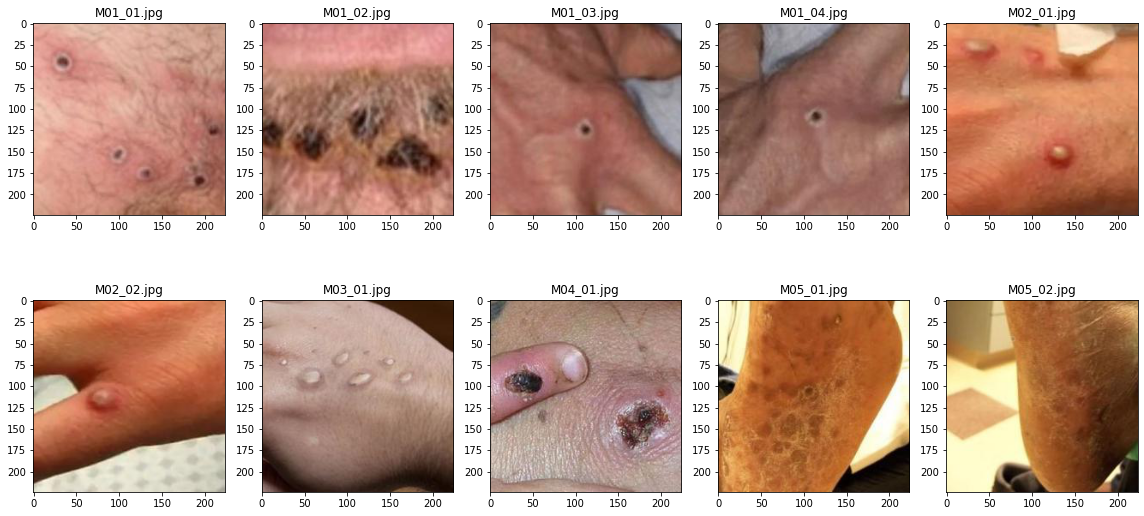

In [41]:
x = pluto.draw_batch(pluto.df_monkey_data["fname"])

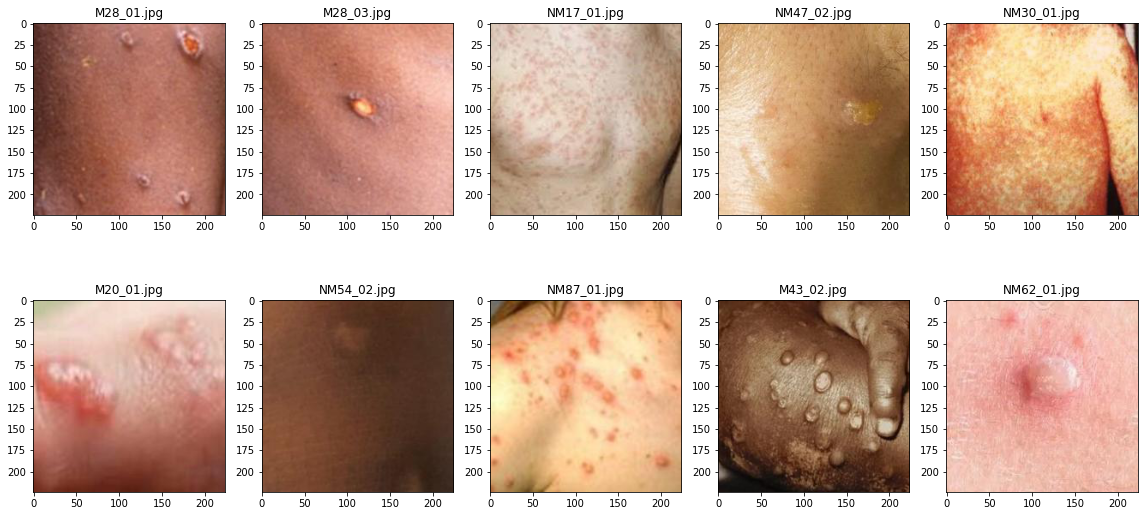

In [37]:
x = pluto.draw_batch(pluto.df_monkey_data["fname"], is_shuffle=True)

- For Nike, Adidas and Converse Shoes Images

In [38]:
url = 'https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 15.6M/15.6M [00:00<00:00, 228MB/s]

In [39]:
import os
#
@add_method(PackTDataAug)
def build_shoe_fname(self, start_path):
  df = pandas.DataFrame()
  for root, dirs, files in os.walk(start_path, topdown=False):
   for name in files:
      f = os.path.join(root, name)
      p = pathlib.Path(f).parent.name 
      d = pandas.DataFrame({'fname': [f], 'label': [p]})
      df = df.append(d, ignore_index=True)
  #
  # clean it up
  df = df.reset_index(drop=True)
  return df

In [40]:
f = 'kaggle/nike-adidas-and-converse-imaged/train'
pluto.df_shoe_data = pluto.build_shoe_fname(f)
pluto.df_shoe_data.head(3)

fname   label
0  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
1  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
2  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas

In [41]:
pluto.df_shoe_data.tail(3)

fname label
708  kaggle/nike-adidas-and-converse-imaged/train/n...  nike
709  kaggle/nike-adidas-and-converse-imaged/train/n...  nike
710  kaggle/nike-adidas-and-converse-imaged/train/n...  nike

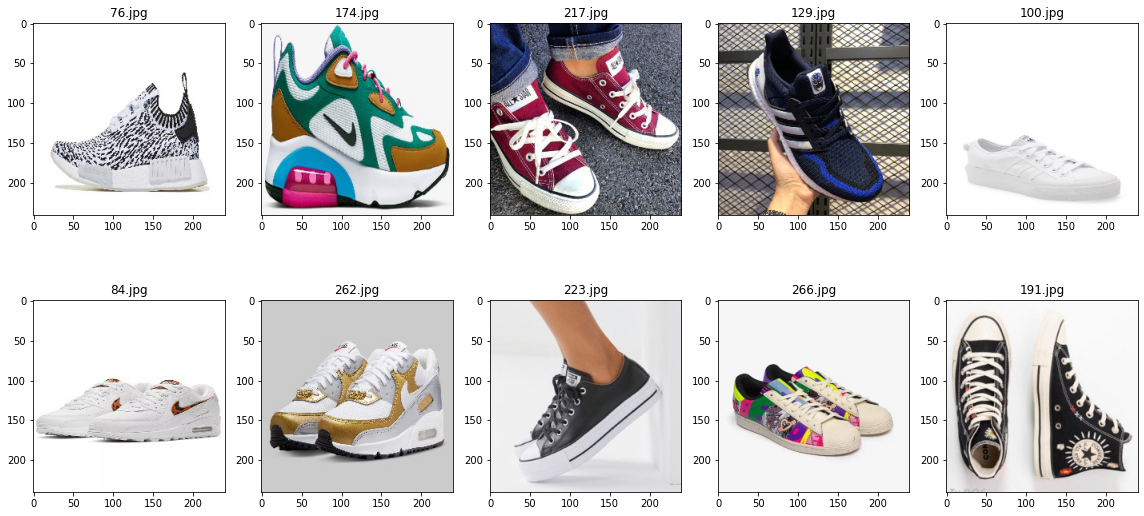

In [43]:
x = pluto.draw_batch(pluto.df_shoe_data["fname"], is_shuffle=True)

# Summary

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- I wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.



In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm